# SANKET G PATIL

##  Data Science and Business Analytics Tasks.

## Task 6

Prediction using Decision Tree Algorithm
(Level - Intermediate)

● Create the Decision Tree classifier and visualize it graphically. 

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

● Dataset : https://bit.ly/3kXTdox
        
● Sample Solution : https://bit.ly/2G6sYx9

### Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.


### Importing the required libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the Dataset

In [2]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris.csv")
print('data downloaded')
print('shape=',data.shape)
data.head(10)

data downloaded
shape= (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Now we will Drop the id axis because it is of no purpose.

In [3]:
data.drop('Id',axis=1,inplace=True)

### Displaying the columns and the very basic info using data.info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Now lets Check if there is any missing values.

In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Now check for column names.

In [6]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Target variable ,value_counts

In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### We use the describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### From sklearn importing preprocessing to assign values to catagorical data

In [9]:
from sklearn import preprocessing
plant = preprocessing.LabelEncoder()
plant.fit([ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
data['Species'] = plant.transform(data['Species'])

In [10]:
y = data['Species']

In [11]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

### seperating the data to train and test set to train the model and test it using test data 

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=3)

In [13]:
y_trainset.shape

(135,)

In [14]:
X_testset.shape

(15, 4)

### importing the decision tree clasifier from sklearn 

In [15]:
from sklearn.tree import DecisionTreeClassifier
species = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
species

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
species.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### predicting the output for the trained algorithm 

In [17]:
predspecies = species.predict(X_testset)

In [18]:
print (predspecies)
print (y_testset)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2]
47     0
3      0
31     0
25     0
15     0
118    2
89     1
6      0
103    2
65     1
88     1
38     0
92     1
53     1
140    2
Name: Species, dtype: int64


### Checking the accuracy of the predicted model 

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predspecies))

DecisionTrees's Accuracy:  1.0


 we have obtained 100% accuracy for the predicted model

## Displaying the decision tree algorithm 

In [20]:
# Install required libraries
!pip install pydotplus
!pip install graphviz
!pip install sklearn

In [21]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [22]:
from sklearn.externals.six import StringIO 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


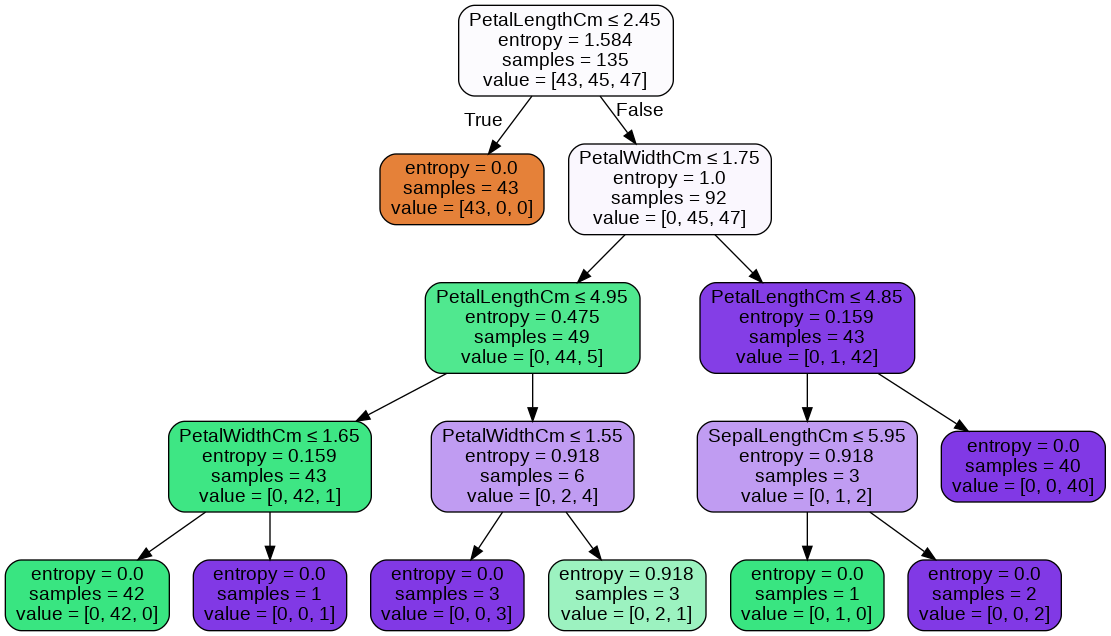

In [23]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(species, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())